# Pós-Graduação FACENS: Introdução IA
## Tarefa 3 - Mobile 

---

Nome: Mariana Mildemberger
<br>RA: 122741

---

## Importando as dependências

In [140]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Carregando o dataset

In [141]:
#Carregando o dataset de treino
df_tr = pd.read_csv('mobile_train.csv')
df_tr = df_tr.drop(columns = 'Unnamed: 0')
pd.set_option('display.max_columns', None)
df_tr.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7 GB,0.6,188,2,2,20,NaN,2549,9,7,19,0,NaN,True,1
1,1021,1,0.5,1,0,1,53 GB,0.7,136,3,6,905,NaN,2631,17,3,7,1,NaN,False,2
2,563,1,0.5,1,2,1,41 GB,0.9,145,5,6,1263,NaN,2603,11,2,9,1,NaN,NaN,2
3,615,1,NaN,0,0,0,10 GB,0.8,131,6,9,1216,1786.0,2769,16,8,11,1,NaN,False,2
4,1821,1,NaN,0,13,1,44 GB,0.6,141,2,14,1208,1212.0,1411,8,2,15,1,NaN,False,1


In [142]:
df_tr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    1572 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   object 
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       616 non-null    float64
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [143]:
#Carregando o dataset de teste
df_tt = pd.read_csv('mobile_test.csv')
df_tt = df_tt.drop(columns = 'id')
#pd.set_option('display.max_columns', None)
df_tt.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1043,1,1.8,1,14,0,5,0.1,193,3,16,226,1412,3476,12,7,2,0,1,0
1,841,1,0.5,1,4,1,61,0.8,191,5,12,746,857,3895,6,0,7,1,0,0
2,1807,1,2.8,0,1,0,27,0.9,186,3,4,1270,1366,2396,17,10,10,0,1,1
3,1546,0,0.5,1,18,1,25,0.5,96,8,20,295,1752,3893,10,0,7,1,1,0
4,1434,0,1.4,0,11,1,49,0.5,108,6,18,749,810,1773,15,8,7,1,0,1


In [144]:
df_tt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  1000 non-null   int64  
 1   blue           1000 non-null   int64  
 2   clock_speed    1000 non-null   float64
 3   dual_sim       1000 non-null   int64  
 4   fc             1000 non-null   int64  
 5   four_g         1000 non-null   int64  
 6   int_memory     1000 non-null   int64  
 7   m_dep          1000 non-null   float64
 8   mobile_wt      1000 non-null   int64  
 9   n_cores        1000 non-null   int64  
 10  pc             1000 non-null   int64  
 11  px_height      1000 non-null   int64  
 12  px_width       1000 non-null   int64  
 13  ram            1000 non-null   int64  
 14  sc_h           1000 non-null   int64  
 15  sc_w           1000 non-null   int64  
 16  talk_time      1000 non-null   int64  
 17  three_g        1000 non-null   int64  
 18  touch_scr

A ideia é predizer qual o range de preço dos telefones com base no dataset de treino.

## Tratando os dados - Coluna clock_speed:

In [145]:
#Analisar os valores das colunas de treino com nulos:
df_tr['clock_speed'].unique()

array([2.2, 0.5, nan, 1.7, 0.6, 2.9, 2.8, 2.1, 1. , 0.9, 2.6, 1.2, 1.6,
       1.3, 2.3, 3. , 1.4, 2.7, 1.9, 1.5, 2.5, 2. , 1.1, 2.4, 0.7, 1.8,
       0.8])

In [146]:
#Analisar os valores nulos das colunas de treino:
df_tr[df_tr['clock_speed'].isna()]

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
3,615,1,NaN,0,0,0,10 GB,0.8,131,6,9,1216,1786.0,2769,16,8,11,1,NaN,False,2
4,1821,1,NaN,0,13,1,44 GB,0.6,141,2,14,1208,1212.0,1411,8,2,15,1,NaN,False,1
18,1131,1,NaN,1,11,0,49 GB,0.6,101,5,18,658,878.0,1835,19,13,16,1,NaN,False,1
20,772,0,NaN,1,12,0,39 GB,0.8,81,7,14,1314,NaN,2819,17,15,3,1,1.0,False,3
21,1709,1,NaN,0,1,0,13 GB,1.0,156,2,2,974,NaN,3283,17,1,15,1,0.0,NaN,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1962,635,1,NaN,0,9,0,16 GB,1.0,110,7,17,599,NaN,2452,19,17,8,1,NaN,False,2
1967,1783,0,NaN,1,2,0,42 GB,0.7,104,6,8,1081,NaN,387,14,5,3,0,NaN,False,1
1980,930,1,NaN,1,4,1,4 GB,0.9,144,8,10,1017,1289.0,2016,13,10,16,1,NaN,True,1
1984,797,0,NaN,1,0,0,37 GB,0.9,144,7,2,206,NaN,2216,9,5,6,1,0.0,False,1


In [147]:
df_tr['clock_speed'].describe()

count    1572.000000
mean        1.521056
std         0.820540
min         0.500000
25%         0.700000
50%         1.500000
75%         2.200000
max         3.000000
Name: clock_speed, dtype: float64

<AxesSubplot:xlabel='clock_speed', ylabel='count'>

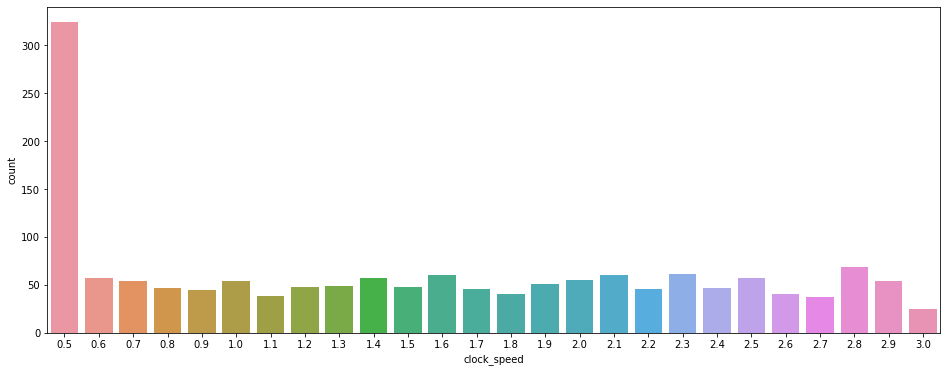

In [148]:
#Checando a distribuição de clock_speed
plt.figure(figsize = (16,6))
ax = sns.countplot(x="clock_speed", data = df_tr)
ax

In [149]:
#Substituindo NaN pelo valor mais comum
mode = df_tr.clock_speed.mode().loc[0]
mode

0.5

In [150]:
#verificando se tirou todos os NaN
df_tr['clock_speed'].fillna(mode, inplace = True)
df_tr['clock_speed'].drop_duplicates()

0      2.2
1      0.5
6      1.7
9      0.6
10     2.9
12     2.8
13     2.1
15     1.0
17     0.9
22     2.6
24     1.2
26     1.6
35     1.3
36     2.3
50     3.0
51     1.4
56     2.7
65     1.9
69     1.5
78     2.5
90     2.0
101    1.1
104    2.4
105    0.7
110    1.8
182    0.8
Name: clock_speed, dtype: float64

## Tratando os dados - Coluna px_width:

In [151]:
#Analisando os Nan da coluna px_width
df_tr['px_width'].unique()

array([  nan, 1786., 1212., 1005., 1440., 1850.,  878., 1064., 1245.,
       1434.,  645., 1739., 1249.,  815., 1613., 1652., 1832., 1287.,
       1036.,  820.,  683., 1781., 1217., 1026., 1206., 1616., 1118.,
       1203., 1402., 1179.,  891., 1317.,  520., 1504., 1974.,  513.,
       1244., 1954., 1338., 1712., 1376.,  786., 1264., 1248., 1686.,
       1967., 1025., 1533., 1729., 1554.,  842.,  879., 1065.,  831.,
       1698., 1381.,  984., 1464.,  751., 1052.,  873., 1666., 1516.,
        583., 1178.,  517., 1200., 1647.,  637., 1383., 1108., 1604.,
       1882.,  765., 1928.,  952.,  714.,  888.,  527., 1493., 1891.,
       1664.,  882.,  776., 1462., 1130.,  557., 1910., 1078.,  724.,
       1104., 1224., 1023.,  935., 1898., 1463., 1584., 1253., 1565.,
       1038., 1186., 1195., 1706., 1510.,  814., 1247., 1814.,  642.,
        550.,  699., 1126., 1139., 1506., 1161.,  660.,  973.,  596.,
        990.,  758., 1205., 1798., 1744.,  740., 1905., 1325.,  772.,
       1131., 1370.,

In [152]:
df_tr[df_tr['px_width'].isna()]

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7 GB,0.6,188,2,2,20,NaN,2549,9,7,19,0,NaN,True,1
1,1021,1,0.5,1,0,1,53 GB,0.7,136,3,6,905,NaN,2631,17,3,7,1,NaN,False,2
2,563,1,0.5,1,2,1,41 GB,0.9,145,5,6,1263,NaN,2603,11,2,9,1,NaN,NaN,2
5,1859,0,0.5,1,3,0,22 GB,0.7,164,1,7,1004,NaN,1067,17,1,10,1,0.0,NaN,1
6,1821,0,1.7,0,4,1,10 GB,0.8,139,8,10,381,NaN,3220,13,8,18,1,0.0,True,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1994,858,0,2.2,0,1,0,50 GB,0.1,84,1,2,528,NaN,3978,17,16,3,1,NaN,False,3
1995,794,1,0.5,1,0,1,2 GB,0.8,106,6,14,1222,NaN,668,13,4,19,1,NaN,False,0
1997,1911,0,0.9,1,1,1,36 GB,0.7,108,8,3,868,NaN,3057,9,1,5,1,1.0,False,3
1998,1512,0,0.9,0,4,1,46 GB,0.1,145,5,5,336,NaN,869,18,10,19,1,1.0,True,0


In [153]:
df_tr['px_width'].describe()

count     616.000000
mean     1232.762987
std       431.292098
min       507.000000
25%       863.500000
50%      1231.000000
75%      1613.500000
max      1998.000000
Name: px_width, dtype: float64

<AxesSubplot:xlabel='px_width', ylabel='Count'>

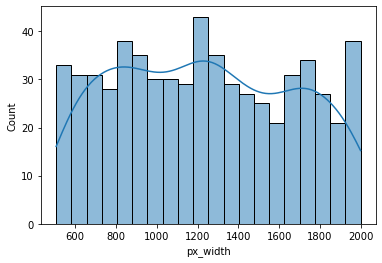

In [154]:
sns.histplot(df_tr['px_width'], bins = 20, kde=True)

In [155]:
#Substituindo NaN pelo valor mais comum
mean = round(df_tr.px_width.mean())
mean

1233

In [156]:
df_tr['px_width'].fillna(mean, inplace = True)
df_tr['px_width'].unique()

array([1233., 1786., 1212., 1005., 1440., 1850.,  878., 1064., 1245.,
       1434.,  645., 1739., 1249.,  815., 1613., 1652., 1832., 1287.,
       1036.,  820.,  683., 1781., 1217., 1026., 1206., 1616., 1118.,
       1203., 1402., 1179.,  891., 1317.,  520., 1504., 1974.,  513.,
       1244., 1954., 1338., 1712., 1376.,  786., 1264., 1248., 1686.,
       1967., 1025., 1533., 1729., 1554.,  842.,  879., 1065.,  831.,
       1698., 1381.,  984., 1464.,  751., 1052.,  873., 1666., 1516.,
        583., 1178.,  517., 1200., 1647.,  637., 1383., 1108., 1604.,
       1882.,  765., 1928.,  952.,  714.,  888.,  527., 1493., 1891.,
       1664.,  882.,  776., 1462., 1130.,  557., 1910., 1078.,  724.,
       1104., 1224., 1023.,  935., 1898., 1463., 1584., 1253., 1565.,
       1038., 1186., 1195., 1706., 1510.,  814., 1247., 1814.,  642.,
        550.,  699., 1126., 1139., 1506., 1161.,  660.,  973.,  596.,
        990.,  758., 1205., 1798., 1744.,  740., 1905., 1325.,  772.,
       1131., 1370.,

### Tratando os dados - touch_screen:

<Figure size 1152x432 with 0 Axes>

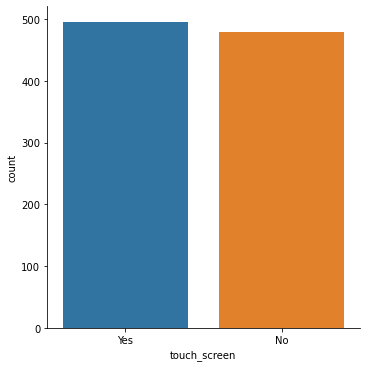

In [157]:
plt.figure(figsize = (16,6))
category = {"Yes" : 0, "No": 1}
touch_sreen_dropna = df_tr[df_tr['touch_screen'].notna()]

ax = sns.catplot(x="touch_screen", kind = 'count', data = touch_sreen_dropna)
ax.set(xticklabels = category)
ax

In [158]:
df_tr['touch_screen'].value_counts()

0.0    496
1.0    480
Name: touch_screen, dtype: int64

In [159]:
proporcao = df_tr['touch_screen'].value_counts()[1]/df_tr['touch_screen'].value_counts()[0]
proporcao

0.967741935483871

Considerando que são valores muito próximos, vou completar pelo metodo de preenchimento.

In [160]:
df_tr['touch_screen'].fillna(method = 'bfill', inplace = True)
df_tr['touch_screen'].unique()

array([0., 1.])

In [161]:
df_tr['touch_screen'].value_counts()

0.0    1043
1.0     957
Name: touch_screen, dtype: int64

In [162]:
proporcao = df_tr['touch_screen'].value_counts()[1]/df_tr['touch_screen'].value_counts()[0]
proporcao

0.9175455417066155

As proporções ficaram parecidas. Há algum método de preencher proporcionalmente? - não achei

### Tratando os dados - Coluna wifi:

<Figure size 1152x432 with 0 Axes>

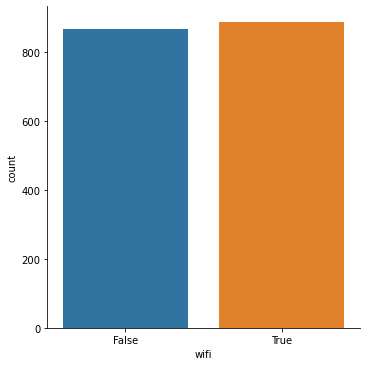

In [163]:
plt.figure(figsize = (16,6))

ax = sns.catplot(x="wifi", kind = 'count', data = df_tr)
ax

In [164]:
df_tr['wifi'].value_counts()

True     888
False    866
Name: wifi, dtype: int64

In [165]:
proporcao = df_tr['wifi'].value_counts()[0]/df_tr['wifi'].value_counts()[1]
proporcao

0.9752252252252253

Considerando que são valores muito próximos, vou completar pelo metodo de preenchimento.

In [166]:
df_tr['wifi'].fillna(method = 'bfill', inplace = True)
df_tr['wifi'].unique()

array([ True, False])

In [167]:
proporcao = df_tr['wifi'].value_counts()[0]/df_tr['wifi'].value_counts()[1]
proporcao

0.9960079840319361

As proporções ficaram parecidas.

Depois de todos os tratamentos de dados faltantes:

In [168]:
df_tr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   object 
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   float64
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

Apenas uma coluna se mantém no tipo object. 

### Tratando os dados - Coluna int_memory:

In [169]:
df_tr['int_memory'].unique()

array(['7 GB', '53 GB', '41 GB', '10 GB', '44 GB', '22 GB', '24 GB',
       '9 GB', '33 GB', '17 GB', '52 GB', '46 GB', '13 GB', '23 GB',
       '49 GB', '19 GB', '39 GB', '47 GB', '38 GB', '8 GB', '57 GB',
       '51 GB', '21 GB', '5 GB', '60 GB', '61 GB', '6 GB', '11 GB',
       '50 GB', '34 GB', '20 GB', '27 GB', '42 GB', '40 GB', '64 GB',
       '14 GB', '63 GB', '43 GB', '16 GB', '48 GB', '12 GB', '55 GB',
       '36 GB', '30 GB', '45 GB', '29 GB', '58 GB', '25 GB', '3 GB',
       '54 GB', '15 GB', '37 GB', '31 GB', '32 GB', '4 GB', '18 GB',
       '2 GB', '56 GB', '26 GB', '35 GB', '59 GB', '28 GB', '62 GB'],
      dtype=object)

In [170]:
df_tr['int_memory'] = df_tr['int_memory'].astype('str').str.extractall('(\d+)').unstack().fillna('').sum(axis=1).astype('int64')
df_tr['int_memory']

0        7
1       53
2       41
3       10
4       44
        ..
1995     2
1996    39
1997    36
1998    46
1999    45
Name: int_memory, Length: 2000, dtype: int64

### Tratando os dados - comparando os tipos de dados de cada dataset:

In [171]:
df_tr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   float64
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [172]:
df_tt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  1000 non-null   int64  
 1   blue           1000 non-null   int64  
 2   clock_speed    1000 non-null   float64
 3   dual_sim       1000 non-null   int64  
 4   fc             1000 non-null   int64  
 5   four_g         1000 non-null   int64  
 6   int_memory     1000 non-null   int64  
 7   m_dep          1000 non-null   float64
 8   mobile_wt      1000 non-null   int64  
 9   n_cores        1000 non-null   int64  
 10  pc             1000 non-null   int64  
 11  px_height      1000 non-null   int64  
 12  px_width       1000 non-null   int64  
 13  ram            1000 non-null   int64  
 14  sc_h           1000 non-null   int64  
 15  sc_w           1000 non-null   int64  
 16  talk_time      1000 non-null   int64  
 17  three_g        1000 non-null   int64  
 18  touch_scr

In [173]:
#Corrigindo os tipos para manter os dois datasets iguais.
#mudar os tipos das colunas:
#px_width -> float64 to int64
#touch_screen -> float64 to int64
#wifi -> bool to int64

df_tr.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,1233.0,2549,9,7,19,0,0.0,True,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1233.0,2631,17,3,7,1,0.0,False,2
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1233.0,2603,11,2,9,1,0.0,False,2
3,615,1,0.5,0,0,0,10,0.8,131,6,9,1216,1786.0,2769,16,8,11,1,0.0,False,2
4,1821,1,0.5,0,13,1,44,0.6,141,2,14,1208,1212.0,1411,8,2,15,1,0.0,False,1


In [174]:
df_tr['px_width'] = df_tr['px_width'].astype('int64')
df_tr['touch_screen'] = df_tr['touch_screen'].astype('int64')
df_tr['wifi'] = df_tr['wifi'].replace({False : 1, True : 0})
df_tr.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,1233,2549,9,7,19,0,0,0,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1233,2631,17,3,7,1,0,1,2
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1233,2603,11,2,9,1,0,1,2
3,615,1,0.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,1,2
4,1821,1,0.5,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,0,1,1


In [175]:
#Confirmando a edição:
df_tr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

## Análise exploratória e visualização de dados - EDA / Data Viz

Agora que ambos os datasets foram tratados, é hora de entender os dados do dataset de treino.

Buscando mais infos sobre o dataset:

TIPO - nome_coluna = explicação

NUM - battery_power = Total energy a battery can store in one time measured in mAh

CAT - blue = Has bluetooth or not

NUM - clock_speed = speed at which microprocessor executes instructions

CAT - dual_sim = Has dual sim support or not

NUM - fc = Front Camera mega pixels

CAT - four_g = Has 4G or not

NUM - int_memory = Internal Memory in Gigabytes

NUM - m_dep = Mobile Depth in cm

NUM - mobile_wt = Weight of mobile phone

NUM -  n_cores = Number of cores of processor

NUM - pc = Primary Camera mega pixels

NUM - px_height = Pixel Resolution Height

NUM - px_width = Pixel Resolution Width

NUM - ram = Random Access Memory in Mega Bytes

NUM - sc_h = Screen Height of mobile in cm

NUM - sc_w = Screen Width of mobile in cm

NUM - talk_time = longest time that a single battery charge will last when you are

CAT - three_g = Has 3G or not

CAT - touch_screen = Has touch screen or not

CAT - wifi = Has wifi or not

CAT - price_range = This is the target variable with value of 0(low cost), 1(medium cost), 2(high cost) and 3(very high cost).

In [176]:
df_tr.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,1233,2549,9,7,19,0,0,0,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1233,2631,17,3,7,1,0,1,2
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1233,2603,11,2,9,1,0,1,2
3,615,1,0.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,1,2
4,1821,1,0.5,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,0,1,1


In [177]:
df_tr.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.302550,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,9.916500,645.108000,1232.927000,2124.213000,12.306500,5.767000,11.011000,0.761500,0.478500,0.499000,1.500000
std,439.418206,0.5001,0.839393,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,6.064315,443.780811,239.222876,1084.732044,4.213245,4.356398,5.463955,0.426273,0.499662,0.500124,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,0.000000,0.000000,507.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.500000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,5.000000,282.750000,1233.000000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.000000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,10.000000,564.000000,1233.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,0.000000,0.000000,1.500000
75%,1615.250000,1.0000,2.000000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,15.000000,947.250000,1233.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,20.000000,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [178]:
df_tr.corr()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
battery_power,1.000000,0.011252,0.016784,-0.041847,0.033334,0.015665,-0.004004,0.034085,0.001844,-0.029727,0.031441,0.014901,0.006401,-0.000653,-0.029959,-0.021421,0.052510,0.011522,-0.031721,0.002922,0.200723
blue,0.011252,1.000000,0.012603,0.035198,0.003593,0.013443,0.041177,0.004049,-0.008605,0.036161,-0.009952,-0.006872,-0.021822,0.026351,-0.002952,0.000613,0.013934,-0.030236,0.020590,0.027981,0.020573
clock_speed,0.016784,0.012603,1.000000,-0.001190,0.013003,-0.038358,0.001037,-0.038680,0.008709,-0.012336,-0.013058,-0.015849,-0.011736,-0.002860,-0.030774,-0.019811,0.016551,-0.040661,-0.011021,-0.001722,-0.004716
dual_sim,-0.041847,0.035198,-0.001190,1.000000,-0.029123,0.003187,-0.015679,-0.022142,-0.008979,-0.024658,-0.017143,-0.020875,0.019101,0.041072,-0.011949,-0.016666,-0.039404,-0.014008,0.006825,-0.008964,0.017444
fc,0.033334,0.003593,0.013003,-0.029123,1.000000,-0.016560,-0.029133,-0.001791,0.023618,-0.013356,0.644595,-0.009990,-0.007899,0.015099,-0.011014,-0.012373,-0.006829,0.001793,-0.029101,-0.038679,0.021998
four_g,0.015665,0.013443,-0.038358,0.003187,-0.016560,1.000000,0.008690,-0.001823,-0.016537,-0.029706,-0.005598,-0.019236,0.019746,0.007313,0.027166,0.037005,-0.046628,0.584246,-0.000151,0.041124,0.014772
int_memory,-0.004004,0.041177,0.001037,-0.015679,-0.029133,0.008690,1.000000,0.006886,-0.034214,-0.028310,-0.033273,0.010441,-0.022548,0.032813,0.037771,0.011731,-0.002790,-0.009366,-0.006097,0.003120,0.044435
m_dep,0.034085,0.004049,-0.038680,-0.022142,-0.001791,-0.001823,0.006886,1.000000,0.021756,-0.003504,0.026282,0.025263,0.006951,-0.009434,-0.025348,-0.018388,0.017003,-0.012065,0.044173,0.014058,0.000853
mobile_wt,0.001844,-0.008605,0.008709,-0.008979,0.023618,-0.016537,-0.034214,0.021756,1.000000,-0.018989,0.018844,0.000939,0.001735,-0.002581,-0.033855,-0.020761,0.006209,0.001551,-0.019438,0.002020,-0.030302
n_cores,-0.029727,0.036161,-0.012336,-0.024658,-0.013356,-0.029706,-0.028310,-0.003504,-0.018989,1.000000,-0.001193,-0.006872,0.012148,0.004868,-0.000315,0.025826,0.013148,-0.014733,-0.002678,0.023846,0.004399


<AxesSubplot:>

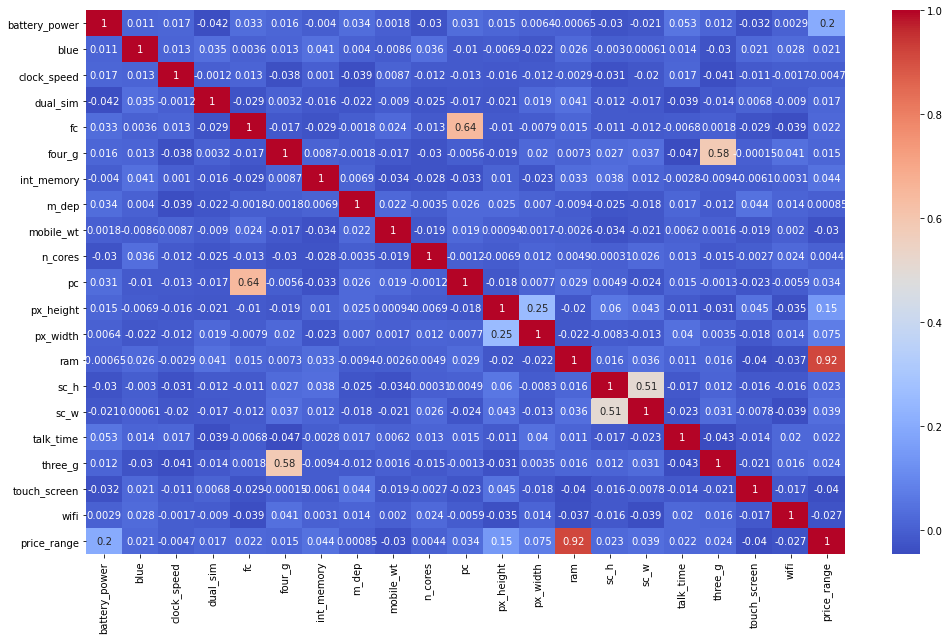

In [179]:
corr = df_tr.corr()
plt.figure(figsize=(17, 10))
sns.heatmap(corr, 
     xticklabels=corr.columns.values,
     yticklabels=corr.columns.values,
     cmap='coolwarm', 
     annot=True)

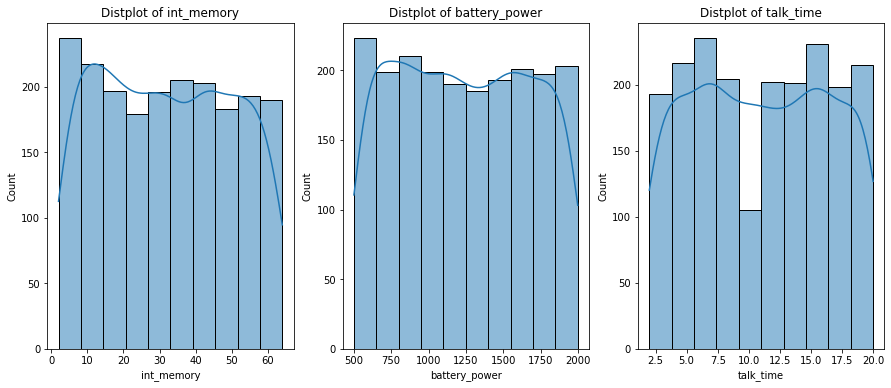

In [180]:
plt.figure(1 , figsize = (15 , 6))
n = 0
for x in ['int_memory' , 'battery_power' , 'talk_time']:
    n = n + 1
    plt.subplot(1 , 3 , n)
    sns.histplot(df_tr[x] , bins = 10, kde=True)
    plt.title('Distplot of {}'.format(x))
plt.show()

<Figure size 1152x432 with 0 Axes>

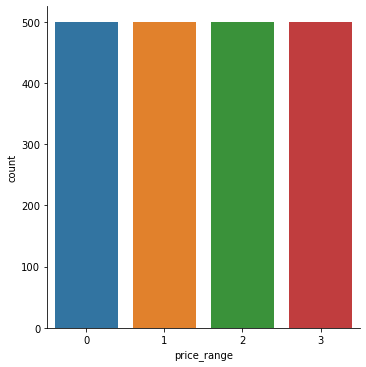

In [181]:
plt.figure(figsize = (16,6))

ax = sns.catplot(x="price_range", kind = 'count', data = df_tr)
ax

In [244]:
value_counts_tr = df_tr['price_range'].value_counts()
value_counts_tr

0    500
1    500
2    500
3    500
Name: price_range, dtype: int64

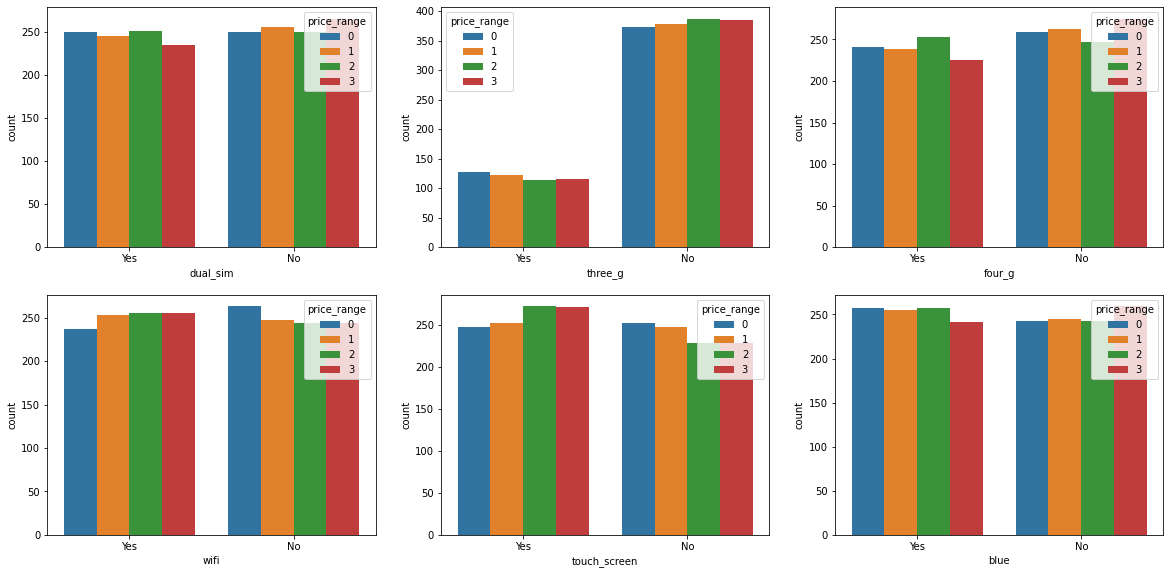

In [183]:
#variáveis categóricas:
fig = plt.figure(figsize = (20,15))

n = 0
for cat in ['dual_sim', 'three_g', 'four_g', 'wifi', 'touch_screen', 'blue']:
    n = n + 1
    ax1 = fig.add_subplot(3, 3, n)
    g = sns.countplot(x = cat_zero[cat], data = df_tr, ax = ax1, hue = 'price_range')
    g.set(xticklabels = category)

plt.show()

In [184]:
df_tr['ram'].describe()

count    2000.000000
mean     2124.213000
std      1084.732044
min       256.000000
25%      1207.500000
50%      2146.500000
75%      3064.500000
max      3998.000000
Name: ram, dtype: float64

Text(0.5, 1.0, 'Distplot of price ram memory')

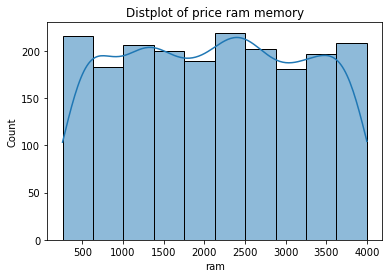

In [185]:
ax = sns.histplot(df_tr['ram'], bins = 10, kde=True)
plt.title('Distplot of price ram memory')

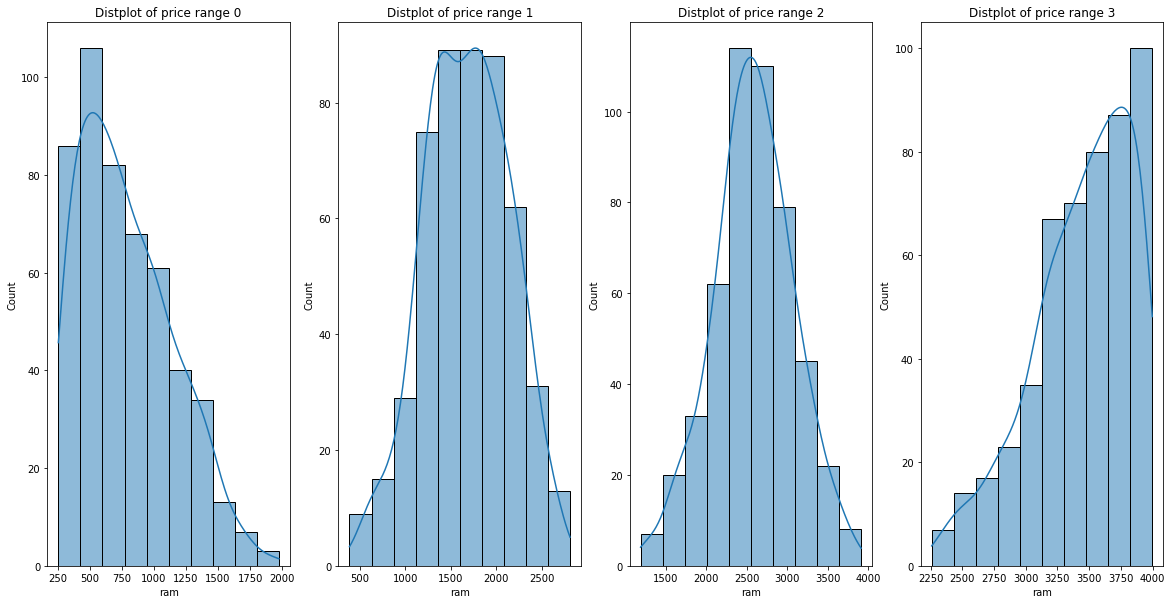

In [186]:
plt.figure(figsize = (20,10 
                         ))
n = 0
for x in [0, 1, 2, 3]:
    n = n + 1
    plt.subplot(1 , 4 , n)
    
    cat = df_tr[df_tr['price_range'] == x]
    sns.histplot(cat['ram'], bins = 10, kde=True)
    plt.title('Distplot of price range {}'.format(x))

plt.show()

## Modelos

In [187]:
#importando os modelos:
#RandomForest
from sklearn.ensemble import RandomForestClassifier

#SVC
from sklearn.svm import SVC

#KNN
from sklearn.neighbors import KNeighborsClassifier

## Métricas

In [188]:
#importando as métricas matriz de confusão e reporte de classificação
from sklearn.metrics import confusion_matrix, classification_report

## Separando em treino e teste

#### Treino

In [189]:
#separando price_range das outras colunas do dataset
X = df_tr.drop(columns = ['price_range'])
y = df_tr['price_range']

In [190]:
#separando teste de treino
from sklearn.model_selection import train_test_split

In [191]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [192]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1340, 20)
(660, 20)
(1340,)
(660,)


## Random Forest - treinamento

In [193]:
#chamando o modelo RandomForest
rf = RandomForestClassifier()

In [194]:
#fitting os dados de treino
rf.fit(X_train, y_train)

RandomForestClassifier()

## Random Forest - prevendo os valores e avaliando os resultados

In [195]:
#prevendo o y considerando o x de teste
y_pred = rf.predict(X_test)

In [196]:
#reporte de classificação
print('Reporte de classificação:\n')
print(classification_report(y_pred, y_test))

Reporte de classificação:

              precision    recall  f1-score   support

           0       0.96      0.89      0.93       180
           1       0.78      0.83      0.80       159
           2       0.76      0.79      0.77       146
           3       0.92      0.90      0.91       175

    accuracy                           0.86       660
   macro avg       0.85      0.85      0.85       660
weighted avg       0.86      0.86      0.86       660



O modelo apresentou 84% de acurácia 

In [197]:
#matriz de confusão:
print('matriz de confusão:\n')
print(confusion_matrix(y_pred, y_test))

matriz de confusão:

[[161  19   0   0]
 [  7 132  20   0]
 [  0  18 115  13]
 [  0   0  17 158]]


## SVC - treinamento

In [198]:
#chamando o modelo SVC
svc = SVC()

In [199]:
#fitting os dados de treino
svc.fit(X_train, y_train)

SVC()

## SVC - prevendo os valores e avaliando os resultados

In [200]:
#prevendo o y considerando o x de teste
y_pred = svc.predict(X_test)

In [201]:
print('Classification report: \n')
print(classification_report(y_pred, y_test))
print('matriz de confusão: \n')
print(confusion_matrix(y_pred, y_test))

Classification report: 

              precision    recall  f1-score   support

           0       0.99      0.94      0.96       177
           1       0.85      0.91      0.88       159
           2       0.84      0.83      0.83       155
           3       0.92      0.93      0.93       169

    accuracy                           0.90       660
   macro avg       0.90      0.90      0.90       660
weighted avg       0.90      0.90      0.90       660

matriz de confusão: 

[[166  11   0   0]
 [  2 144  13   0]
 [  0  14 128  13]
 [  0   0  11 158]]


## KNN - treinamento

In [202]:
knn = KNeighborsClassifier(n_neighbors = 1)

In [203]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

## KNN - prevendo os valores e avaliando os resultados

In [204]:
#prevendo o y considerando o x de teste
y_pred = knn.predict(X_test)

In [205]:
print('Classification report: \n')
print(classification_report(y_pred, y_test))
print('matriz de confusão: \n')
print(confusion_matrix(y_pred, y_test))

Classification report: 

              precision    recall  f1-score   support

           0       0.93      0.92      0.93       170
           1       0.82      0.84      0.83       164
           2       0.82      0.75      0.79       166
           3       0.87      0.93      0.89       160

    accuracy                           0.86       660
   macro avg       0.86      0.86      0.86       660
weighted avg       0.86      0.86      0.86       660

matriz de confusão: 

[[157  13   0   0]
 [ 11 138  15   0]
 [  0  18 125  23]
 [  0   0  12 148]]


## Prevendo os valores e avaliando os resultados para dataset de teste:

In [206]:
df_tt.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1043,1,1.8,1,14,0,5,0.1,193,3,16,226,1412,3476,12,7,2,0,1,0
1,841,1,0.5,1,4,1,61,0.8,191,5,12,746,857,3895,6,0,7,1,0,0
2,1807,1,2.8,0,1,0,27,0.9,186,3,4,1270,1366,2396,17,10,10,0,1,1
3,1546,0,0.5,1,18,1,25,0.5,96,8,20,295,1752,3893,10,0,7,1,1,0
4,1434,0,1.4,0,11,1,49,0.5,108,6,18,749,810,1773,15,8,7,1,0,1


In [207]:
#X_train - dataset de treino menos a coluna de price_range
#y_train - coluna price_range do dataset de treino

#X_test - dataset de teste
#y_test - não existe, não queremos comparar, apenas predizer.
#y_pred - o que eu quero descobrir, adicionando uma coluna no dataset de teste

#separando price_range das outras colunas do dataset de treino
X_train = df_tr.drop(columns = ['price_range'])
y_train = df_tr['price_range']

#selecionando o dataset de teste
X_test = df_tt

In [208]:
#chamando o modelo SVC
svc = SVC()

In [209]:
#fitting os dados de treino
svc.fit(X_train, y_train)

SVC()

In [210]:
#nosso y_pred
#prevendo o y considerando o x de teste
df_tt['price_range'] = svc.predict(X_test)

In [211]:
df_tt.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,1043,1,1.8,1,14,0,5,0.1,193,3,16,226,1412,3476,12,7,2,0,1,0,3
1,841,1,0.5,1,4,1,61,0.8,191,5,12,746,857,3895,6,0,7,1,0,0,3
2,1807,1,2.8,0,1,0,27,0.9,186,3,4,1270,1366,2396,17,10,10,0,1,1,2
3,1546,0,0.5,1,18,1,25,0.5,96,8,20,295,1752,3893,10,0,7,1,1,0,3
4,1434,0,1.4,0,11,1,49,0.5,108,6,18,749,810,1773,15,8,7,1,0,1,1


In [218]:
df_tt['price_range'].unique()

array([3, 2, 1, 0], dtype=int64)

<Figure size 1152x432 with 0 Axes>

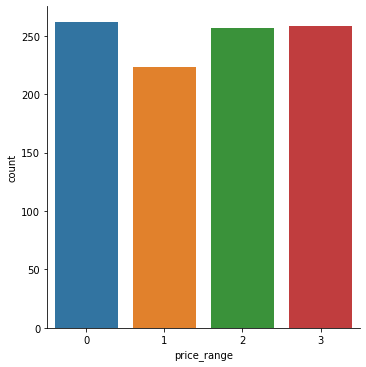

In [214]:
plt.figure(figsize = (16,6))

ax = sns.catplot(x="price_range", kind = 'count', data = df_tt)
ax

In [246]:
value_counts_tt = df_tt['price_range'].value_counts()
value_counts_tt

0    262
3    258
2    257
1    223
Name: price_range, dtype: int64

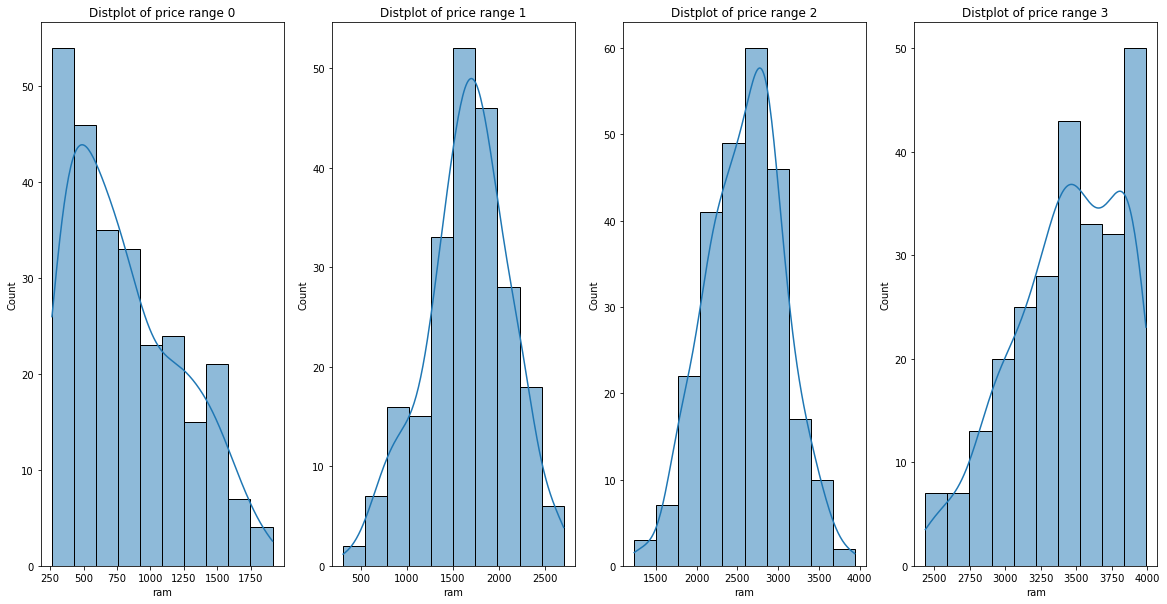

In [219]:
plt.figure(figsize = (20,10))
n = 0
for x in [0, 1, 2, 3]:
    n = n + 1
    plt.subplot(1 , 4 , n)
    
    cat = df_tt[df_tt['price_range'] == x]
    sns.histplot(cat['ram'], bins = 10, kde=True)
    plt.title('Distplot of price range {}'.format(x))

plt.show()

## Comparando os dois datasets

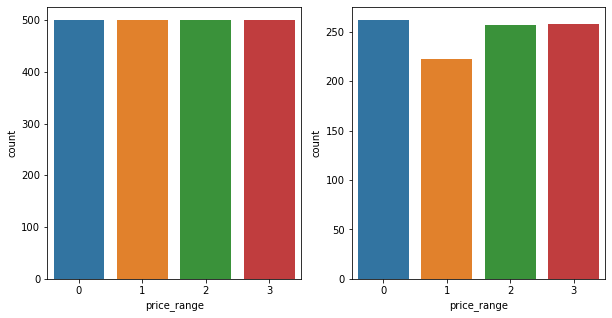

In [235]:
fig = plt.figure(figsize = (10,5))

ax1 = fig.add_subplot(1, 2, 1)
g = sns.countplot(x = 'price_range', data = df_tr, ax = ax1)

ax2 = fig.add_subplot(1, 2, 2)
g = sns.countplot(x = 'price_range', data = df_tt, ax = ax2)

In [248]:
cont_price = pd.DataFrame({
    'Treino' : value_counts_tr,
    'Teste' : value_counts_tt
})
cont_price.index.name = 'price_range'
cont_price

,Treino,Teste
price_range,,
0,500,262
1,500,223
2,500,257
3,500,258


<AxesSubplot:>

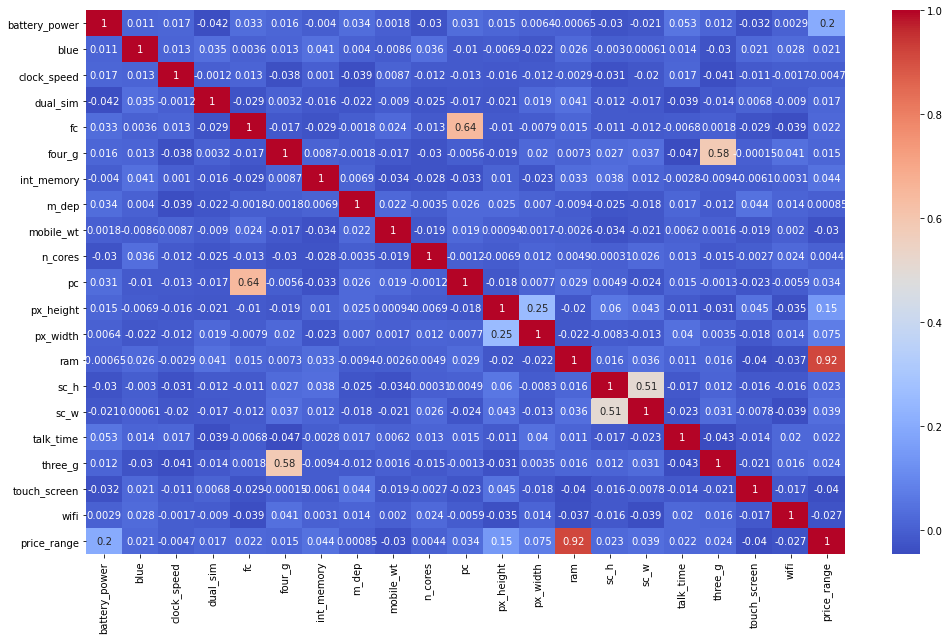

In [271]:
corr_tt = df_tt.corr()
plt.figure(figsize=(17, 10))
sns.heatmap(corr, 
     xticklabels=corr.columns.values,
     yticklabels=corr.columns.values,
     cmap='coolwarm', 
     annot=True)

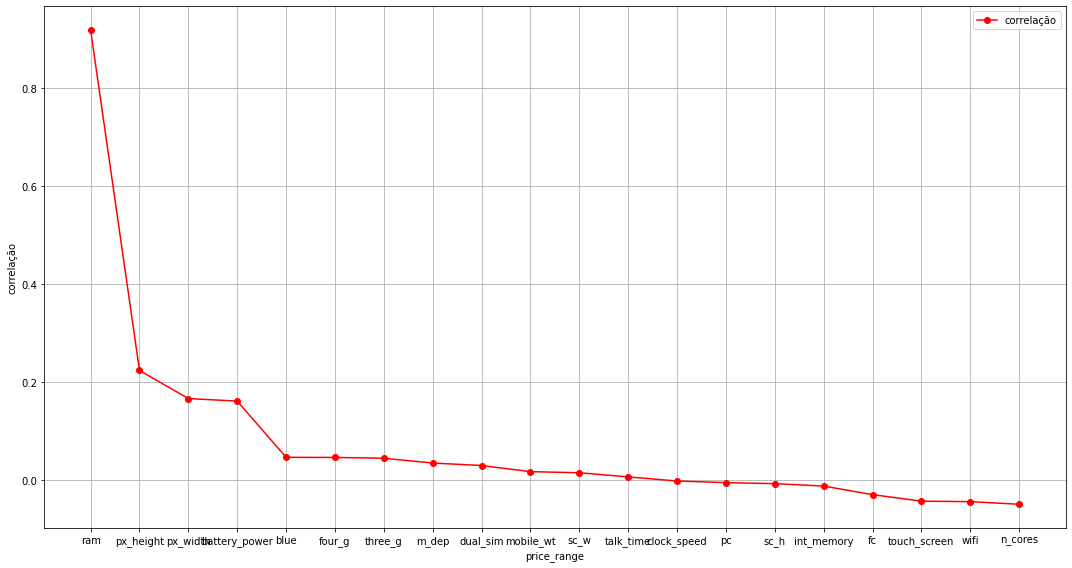

In [291]:
plt.figure(figsize=(15,8))
plt.plot(corr_tt['price_range'].sort_values(ascending=False)[1:], 
         label='correlação', 
         color='r', 
         marker='o')
plt.ylabel('correlação')
plt.xlabel('price_range')
plt.legend()
plt.tight_layout()
plt.grid(True)

## Importando os modelos

In [292]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

## Treinando o modelo de Regressão Linear

In [279]:
#Lembrando que X_train e y_train vêm lá do dataset de treino
X_train = df_tr.drop(columns = ['ram'])
y_train = df_tr['ram']

lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

## Prevendo os valores e avaliando os resultados - Regressão Linear

In [280]:
X_test = df_tt.drop(columns = ['ram'])
y_test = df_tt['ram']

y_pred = lr.predict(X_test)

In [281]:
print('r2 score: {:.2f}'.format(r2_score(y_test, y_pred)))
print('MAE: {:.2f}'.format(mean_absolute_error(y_test, y_pred)))
print('MSE: {:.2f}'.format(mean_squared_error(y_test, y_pred)))
print('RMSE: {:.2f}'.format(np.sqrt(mean_squared_error(y_test, y_pred))))

r2 score: 0.92
MAE: 257.73
MSE: 97388.41
RMSE: 312.07


<AxesSubplot:xlabel='ram'>

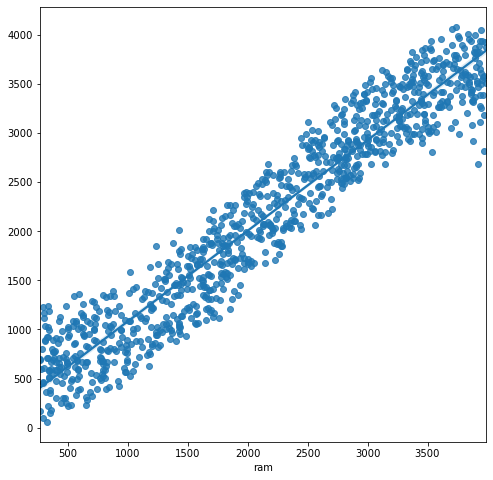

In [282]:
plt.figure(figsize=(8,8))
sns.regplot(x=y_test, y=y_pred)

In [283]:
df_tt['ram'].describe()

count    1000.000000
mean     2138.998000
std      1088.092278
min       263.000000
25%      1237.250000
50%      2153.500000
75%      3065.500000
max      3989.000000
Name: ram, dtype: float64

## Calculando os features mais significativos para o modelo de Regressão Linear

In [284]:
importance = lr.coef_

In [285]:
for i,v in enumerate(importance):
    print('Feature: {}, Score: {:.5f}'.format(i,v))

Feature: 0, Score: -0.48183
Feature: 1, Score: 14.24605
Feature: 2, Score: 1.64131
Feature: 3, Score: 28.38591
Feature: 4, Score: -1.13048
Feature: 5, Score: 1.10875
Feature: 6, Score: -0.63829
Feature: 7, Score: 1.24933
Feature: 8, Score: 0.84356
Feature: 9, Score: -2.45264
Feature: 10, Score: 0.35938
Feature: 11, Score: -0.36584
Feature: 12, Score: -0.25803
Feature: 13, Score: -0.87998
Feature: 14, Score: 0.38176
Feature: 15, Score: 0.06047
Feature: 16, Score: -24.17070
Feature: 17, Score: -2.39752
Feature: 18, Score: -30.32480
Feature: 19, Score: 954.05743


<BarContainer object of 20 artists>

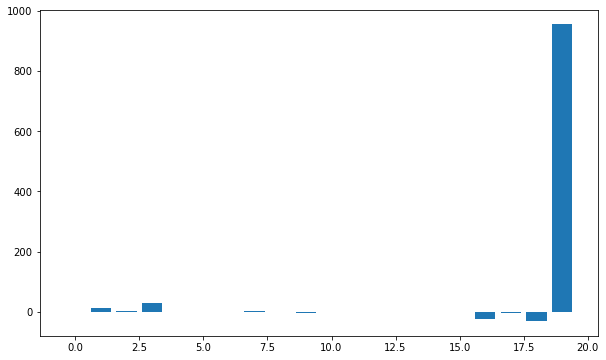

In [286]:
plt.figure(figsize=(10,6))
plt.bar([x for x in range(len(importance))], importance)

## Treinando o modelo de K-Nearest Neighbors (KNN)

In [337]:
knn = KNeighborsRegressor(n_neighbors=19)
knn.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=19)

## Prevendo os valores e avaliando os resultados - KNN

In [338]:
y_pred = knn.predict(X_test)

In [339]:
print('r2 score: {:.2f}'.format(r2_score(y_test, y_pred)))
print('MAE: {:.2f}'.format(mean_absolute_error(y_test, y_pred)))
print('MSE: {:.2f}'.format(mean_squared_error(y_test, y_pred)))
print('RMSE: {:.2f}'.format(np.sqrt(mean_squared_error(y_test, y_pred))))

r2 score: -0.06
MAE: 965.85
MSE: 1249016.85
RMSE: 1117.59


## Encontrando o melhor valor de K pelo método gráfico

In [313]:
rmse = []

for i in range(1,20):
    knn = KNeighborsRegressor(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    rmse.append(np.sqrt(mean_squared_error(y_test, pred_i)))

In [314]:
x = {'k': range(1,20), 'rmse': rmse}
df = pd.DataFrame(x)

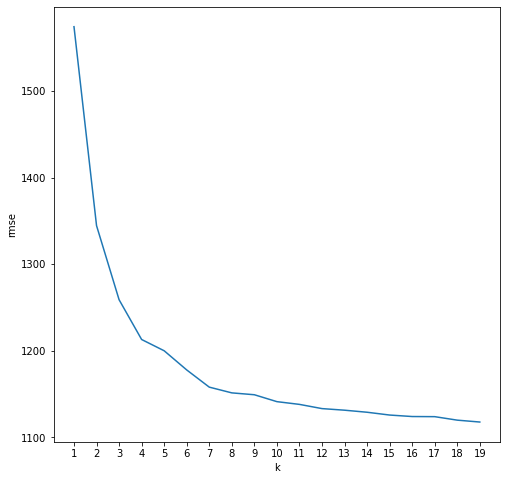

In [315]:
plt.figure(figsize=(8,8))
g = sns.lineplot(data=df, x='k',y='rmse')

g.set_xticks(range(1,20))

In [316]:
df.iloc[df['rmse'].idxmin(),:]

k         19.000000
rmse    1117.594222
Name: 18, dtype: float64

## Encontrando o melhor valor de K pelo Grid Search Cross Validation

In [317]:
from sklearn.model_selection import GridSearchCV

In [329]:
param = {'n_neighbors': [1,2,3,4,5,7,10,15,16,17, 18, 19]}

In [330]:
from sklearn import metrics
metrics.SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'top_k_accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_wei

In [331]:
knn = KNeighborsRegressor()
knn_grid = GridSearchCV(knn, param, cv=4, scoring='r2')
knn_grid.fit(X_train, y_train)

GridSearchCV(cv=4, estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 7, 10, 15, 16, 17, 18,
                                         19]},
             scoring='r2')

In [332]:
pd.DataFrame(knn_grid.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
0,0.007427,0.004351,0.029530,0.004336,1,{'n_neighbors': 1},-1.175045,-0.933563,-0.962874,-1.302169,-1.093413,0.152344,12
1,0.009442,0.006597,0.025823,0.006385,2,{'n_neighbors': 2},-0.686028,-0.504739,-0.534761,-0.689065,-0.603648,0.084574,11
2,0.002628,0.004551,0.036133,0.004921,3,{'n_neighbors': 3},-0.459512,-0.328606,-0.366918,-0.491468,-0.411626,0.066255,10
3,0.001556,0.002695,0.056754,0.008031,4,{'n_neighbors': 4},-0.384594,-0.236782,-0.278936,-0.385136,-0.321362,0.065229,9
4,0.010200,0.006398,0.046551,0.002829,5,{'n_neighbors': 5},-0.299453,-0.194411,-0.206546,-0.298551,-0.249740,0.049450,8
5,0.006073,0.006560,0.051253,0.006976,7,{'n_neighbors': 7},-0.237218,-0.152911,-0.147054,-0.170417,-0.176900,0.035870,7
6,0.005148,0.005628,0.049105,0.004505,10,{'n_neighbors': 10},-0.140713,-0.121675,-0.122890,-0.116380,-0.125414,0.009165,6
7,0.010995,0.007674,0.047143,0.006011,15,{'n_neighbors': 15},-0.094003,-0.084682,-0.064037,-0.086276,-0.082249,0.011090,5
8,0.009494,0.006650,0.048481,0.002101,16,{'n_neighbors': 16},-0.086093,-0.085125,-0.064479,-0.074965,-0.077665,0.008773,4
9,0.007814,0.007814,0.051574,0.004981,17,{'n_neighbors': 17},-0.071724,-0.075410,-0.075320,-0.069386,-0.072960,0.002543,3


In [333]:
print('Melhor valor de K: {}'.format(knn_grid.best_params_))
print('Score do melhor valor de K: {:.2f}'.format(knn_grid.best_score_))

Melhor valor de K: {'n_neighbors': 19}
Score do melhor valor de K: -0.07


## Treinando o modelo de Florestas Aleatórias (Random Forest Regression)

In [340]:
rf = RandomForestRegressor(max_depth=10, n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=10, random_state=42)

## Prevendo os valores e avaliando os resultados

In [341]:
y_pred = rf.predict(X_test)

In [342]:
print('r2 score: {:.2f}'.format(r2_score(y_test, y_pred)))
print('MAE: {:.2f}'.format(mean_absolute_error(y_test, y_pred)))
print('MSE: {:.2f}'.format(mean_squared_error(y_test, y_pred)))
print('RMSE: {:.2f}'.format(np.sqrt(mean_squared_error(y_test, y_pred))))

r2 score: 0.91
MAE: 265.59
MSE: 104771.35
RMSE: 323.68


## Calculando os features mais significativos para o modelo de Random Forests

In [343]:
importance = rf.feature_importances_

In [344]:
for i,v in enumerate(importance):
    print('Feature: {}, Score: {:.5f}'.format(i,v))

Feature: 0, Score: 0.05066
Feature: 1, Score: 0.00110
Feature: 2, Score: 0.00374
Feature: 3, Score: 0.00085
Feature: 4, Score: 0.00368
Feature: 5, Score: 0.00080
Feature: 6, Score: 0.00633
Feature: 7, Score: 0.00354
Feature: 8, Score: 0.00773
Feature: 9, Score: 0.00337
Feature: 10, Score: 0.00389
Feature: 11, Score: 0.03838
Feature: 12, Score: 0.00569
Feature: 13, Score: 0.00448
Feature: 14, Score: 0.00449
Feature: 15, Score: 0.00512
Feature: 16, Score: 0.00064
Feature: 17, Score: 0.00086
Feature: 18, Score: 0.00073
Feature: 19, Score: 0.85393


<BarContainer object of 20 artists>

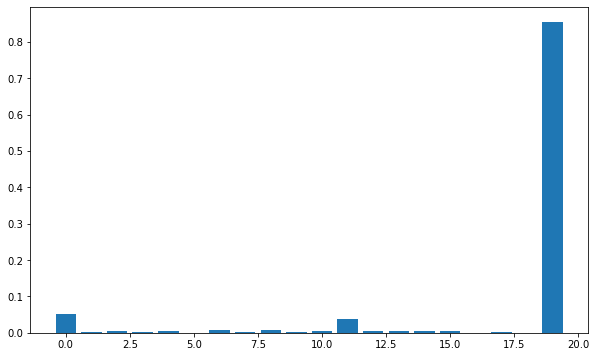

In [345]:
plt.figure(figsize=(10,6))
plt.bar([x for x in range(len(importance))], importance)

<AxesSubplot:xlabel='ram'>

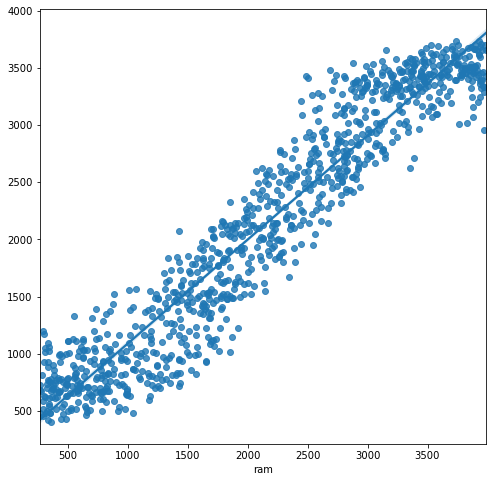

In [346]:
plt.figure(figsize=(8,8))
sns.regplot(x=y_test, y=y_pred)